<a id='startpage'></a>

# Исследование технологического процесса очистки золота

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [26]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML, Image

import warnings
warnings.filterwarnings("ignore")

In [27]:
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date',parse_dates=True) # проиндексируем столбец 'date'
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906


In [3]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date',parse_dates=True)
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date',parse_dates=True)

In [4]:
datasets = [train_df, test_df, full_df]

for dataset in datasets:
    print('Shape:', dataset.shape)
    print('Сумма пропусков:', dataset.isna().sum().sum())
    print('Дубликаты:', dataset.duplicated().sum())
    print('\n')

Shape: (14149, 86)
Сумма пропусков: 4100
Дубликаты: 0


Shape: (5290, 52)
Сумма пропусков: 90
Дубликаты: 0


Shape: (19439, 86)
Сумма пропусков: 4481
Дубликаты: 0




In [5]:
test_df.head(1)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


Заполним пропуски методом `ffill`. 

In [6]:
train_df = train_df.fillna(method='ffill')
test_df = test_df.fillna(method='ffill')
full_df = full_df.fillna(method='ffill')

In [7]:
print("Сумма пропусков train_df:", train_df.isna().sum().sum())
print("Сумма пропусков test_df:", test_df.isna().sum().sum())
print("Сумма пропусков full_df:", full_df.isna().sum().sum())

Сумма пропусков train_df: 0
Сумма пропусков test_df: 0
Сумма пропусков full_df: 0


In [8]:
missing_columns = list(set(train_df.columns) - set(test_df.columns))
missing_columns

['primary_cleaner.output.tail_ag',
 'final.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_au',
 'final.output.concentrate_au',
 'final.output.recovery',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.tail_ag',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.concentrate_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.recovery',
 'primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'final.output.tail_pb',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_au',
 'rougher.o

Мы видим, что в тесте отсутствует часть столбцов, которые характеризуют этапы последующей обработки.
Очевидно, что в тестовой выборке (до начала процесса обработки) их просто не могло быть.

Удалим из обучающей выборки колонки, которых нет в тестовой выборке, кроме целевых признаков. А в текстовую выборку добавим целевые признаки.

In [25]:
full_df_merged = full_df[['rougher.output.recovery', 'final.output.recovery']]
test_df = test_df.merge(full_df_merged, on='date', how='left')

### Проверка корректности расчета параметра `recovery`

In [11]:
def recovery(T, F, C):
    rec = (C*(F-T)) / (F*(C-T)) * 100
    return rec

t,f,c = full_df['rougher.output.tail_au'], full_df['rougher.input.feed_au'], full_df['rougher.output.concentrate_au']
rec = recovery(t, f, c)

print("Среднее:", rec.mean())
print("MAE:", mean_absolute_error(full_df['rougher.output.recovery'].dropna(), rec.dropna()))

Среднее: 83.3285873508393
MAE: 9.874045668302637e-15


Параметр `recovery` в train рассчитан корректно.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

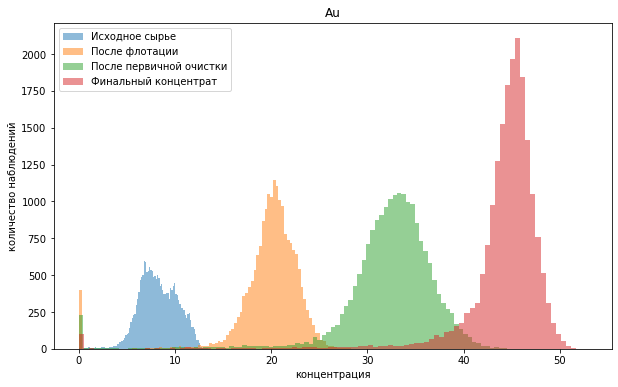

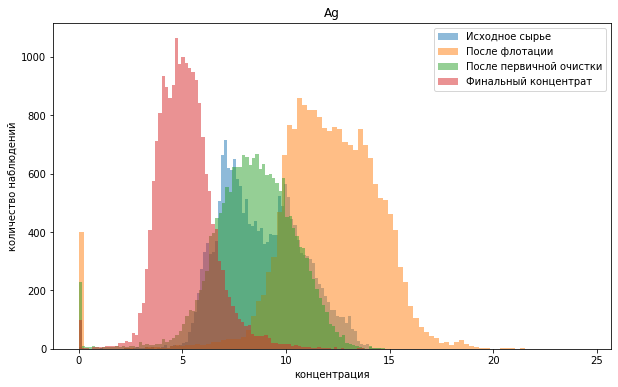

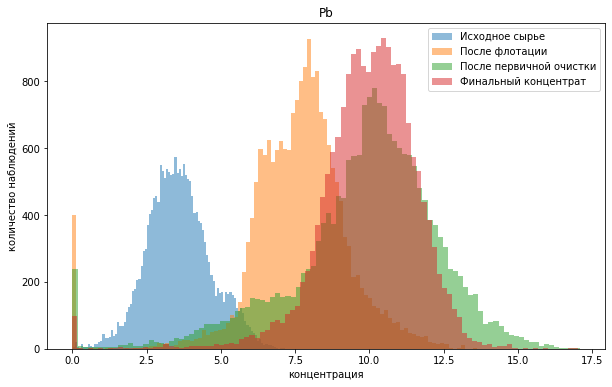

In [12]:
RAW = 'rougher.input.feed_'
ROUGHER = 'rougher.output.concentrate_'
PRIMARI = 'primary_cleaner.output.concentrate_'
FINAL = 'final.output.concentrate_'

def hist_metal(raw, rougher, primary, final, metal):
    '''
    Функция для построения гистограмм концентраций
    металлов на различных этапах очистки.
    Принимает на вход концентрации на разных этапах:
    исходном сырье, после флотации, после первичной очистки, в финальном концентрате 
    и название металла.    
    '''

    plt.figure(figsize=(10, 6))
    plt.hist(raw, bins=100, alpha=0.5, label='Исходное сырьe')
    plt.hist(rougher, bins=100, alpha=0.5, label='После флотации')
    plt.hist(primary, bins=100, alpha=0.5, label='После первичной очистки')
    plt.hist(final, bins=100, alpha=0.5, label='Финальный концентрат')
    plt.title(metal)
    plt.xlabel('концентрация')
    plt.ylabel('количество наблюдений')
    plt.legend()
    plt.show()

hist_metal(full_df[RAW+'au'], 
           full_df[ROUGHER+'au'], 
           full_df[PRIMARI+'au'], 
           full_df[FINAL+'au'], 
           'Au')
  
hist_metal(full_df[RAW+'ag'], 
           full_df[ROUGHER+'ag'], 
           full_df[PRIMARI+'ag'], 
           full_df[FINAL+'ag'], 
           'Ag')
  
hist_metal(full_df[RAW+'pb'], 
           full_df[ROUGHER+'pb'], 
           full_df[PRIMARI+'pb'], 
           full_df[FINAL+'pb'], 
           'Pb')

**Вывод:**

Как мы видим, изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки происходит по-разному. 

Процесс очистки `Au` от примесей происходит постепенно и ровно, увеличиваясь на последовательных стадиях: концентрации плавно и последовательно с равными скачками (10-12 уд.ед.) растут с каждой стадией. Финальный концентрат достигает значения концентрации около 45 уд.ед.

Для `Ag`: концентрация максимальна после флотации, а далее на процессах первичной очистки и финального концентрата мы наблюдаем, что выделить серебро становится сложнее, поэтому гистограммы этих процессов отображаются левее.

`Pb` на этапе флотации отделяется хорошо (около 5 уд.ед.), но с меньшим диапазоном, чем у золота, а далее на процессе первичной очистки и финального концентрата концентрация становится одинаковой.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

Оценим распределения через построение гистограмм, с использованием параметра density=True, который нормирует данные.

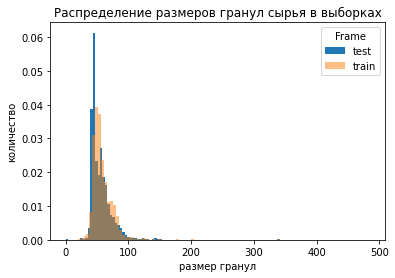

In [13]:
test_df['rougher.input.feed_size'].plot(bins=100, kind='hist', label='test', density=True)
train_df['rougher.input.feed_size'].plot(bins=100, kind='hist', alpha=0.5, label='train', density=True)

plt.legend(title='Frame')
plt.title('Распределение размеров гранул сырья в выборках')
plt.xlabel('размер гранул')
plt.ylabel('количество')
plt.show();

**Вывод:**

Визуально распределения близки, следовательно, формирование тестовой и тренировочной выборки сделано корректно.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

,Исходное сырьe,После флотации,Финальный концентрат
date,,,
2016-01-15 00:00:00,51.680034,66.424950,63.644396
2016-01-15 01:00:00,50.659114,67.012710,63.957723
2016-01-15 02:00:00,50.609929,66.103793,64.311180


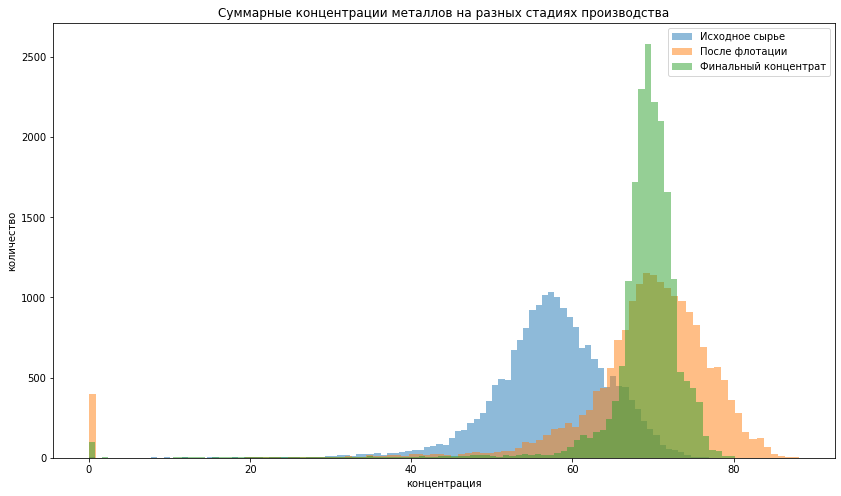

In [14]:
summ_conc = pd.DataFrame()

summ_conc['Исходное сырьe'] = full_df[[RAW+'au', RAW+'ag', RAW+'pb', RAW+'sol']].sum(axis=1)
summ_conc['После флотации'] = full_df[[ROUGHER+'au', ROUGHER+'ag', ROUGHER+'pb', ROUGHER+'sol']].sum(axis=1)
# summ_conc['После первичной очистки'] = full_df[[PRIMARI+'au', PRIMARI+'ag', PRIMARI+'pb', PRIMARI+'sol']].sum(axis=1)
summ_conc['Финальный концентрат'] = full_df[[FINAL+'au', FINAL+'ag', FINAL+'pb', FINAL+'sol']].sum(axis=1)

display(summ_conc.head(3))

plt.figure(figsize=(14, 8))
plt.hist(summ_conc['Исходное сырьe'], bins=100, alpha=0.5, label='Исходное сырьe')
plt.hist(summ_conc['После флотации'], bins=100, alpha=0.5, label='После флотации')
# plt.hist(summ_conc['После первичной очистки'], bins=100, alpha=0.5, label='После первичной очистки')
plt.hist(summ_conc['Финальный концентрат'], bins=100, alpha=0.5, label='Финальный концентрат')
plt.title('Cуммарные концентрации металлов на разных стадиях производства')
plt.xlabel('концентрация')
plt.ylabel('количество')
plt.legend()
plt.show();

**Вывод:**

* Распределения с длинными хвостами слева - выбросами.

* Также много позиций, в которых суммарная концентрация всех металлов равна нулю. Разумно удалить эти позиции, так как в рамках техпроцесса они бессмыслены, нулевые же концентрации отдельного металла необходимо оставить, чтоб модель могла реагировать на такие значения.

Для того, чтобы определить пороговые значения выбросов, построим boxplot.

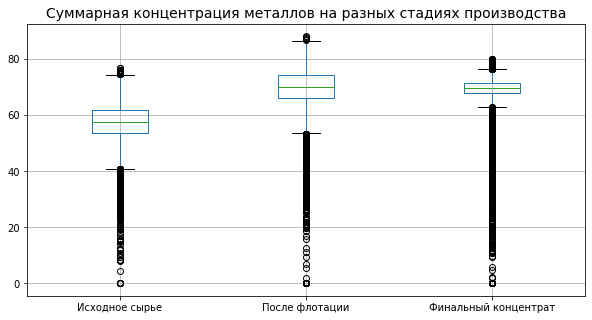

In [15]:
summ_conc.boxplot(figsize=(10,5))
plt.title('Суммарная концентрация металлов на разных стадиях производства', fontsize=14)
plt.show();

На распределениях концентраций металлов на разных этапах наблюдаем тяжелые хвосты. Но такие хвосты могут быть особенностью технологического процесса, поэтому удалим только суммарные нулевые позиции.

In [16]:
train_df = train_df[train_df[[RAW+'au', RAW+'ag', RAW+'pb', RAW+'sol']].sum(1) > 0]
train_df = train_df[train_df[[ROUGHER+'au', ROUGHER+'ag', ROUGHER+'pb', ROUGHER+'sol']].sum(1) > 0]
train_df = train_df[train_df[[FINAL+'au', FINAL+'ag', FINAL+'pb', FINAL+'sol']].sum(1) > 0]

full_df = full_df.loc[test_df.index]
test_df = test_df[full_df[[RAW+'au', RAW+'ag', RAW+'pb', RAW+'sol']].sum(1) > 0]
test_df = test_df[full_df[[ROUGHER+'au', ROUGHER+'ag', ROUGHER+'pb', ROUGHER+'sol']].sum(1) > 0]
test_df = test_df[full_df[[FINAL+'au', FINAL+'ag', FINAL+'pb', FINAL+'sol']].sum(1) > 0]

## Модель

Разобьем выборки на features_ и target_ :

In [17]:
features_train = train_df.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train_df[['rougher.output.recovery', 'final.output.recovery']]

features_test = test_df.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = test_df[['rougher.output.recovery', 'final.output.recovery']]

display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)

(13795, 84)

(13795, 2)

(5154, 52)

(5154, 2)

Удалим столбцы, характеризующие этапы последующей обработки, из `train_df`, которые обнаружили ранее.

In [18]:
features_train = features_train.drop(columns=['final.output.tail_au',
                                              'rougher.output.tail_ag',
                                              'primary_cleaner.output.concentrate_ag',
                                              'rougher.output.tail_au',
                                              'primary_cleaner.output.tail_sol',
                                              'primary_cleaner.output.tail_au',
                                              'primary_cleaner.output.concentrate_pb',
                                              'primary_cleaner.output.tail_ag',
                                              'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                              'secondary_cleaner.output.tail_ag',
                                              'secondary_cleaner.output.tail_pb',
                                              'primary_cleaner.output.concentrate_au',
                                              'final.output.tail_pb',
                                              'final.output.tail_sol',
                                              'rougher.output.tail_pb',
                                              'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                              'rougher.calculation.au_pb_ratio',
                                              'final.output.tail_ag',
                                              'secondary_cleaner.output.tail_au',
                                              'secondary_cleaner.output.tail_sol',
                                              'primary_cleaner.output.tail_pb',
                                              'rougher.calculation.sulfate_to_au_concentrate',
                                              'primary_cleaner.output.concentrate_sol',                           
                                              'rougher.output.tail_sol',
                                              'rougher.output.concentrate_au', 
                                              'rougher.output.concentrate_ag', 
                                              'rougher.output.concentrate_pb', 
                                              'rougher.output.concentrate_sol', 
                                              'final.output.concentrate_au', 
                                              'final.output.concentrate_ag',
                                              'final.output.concentrate_pb', 
                                              'final.output.concentrate_sol'], axis=1)

In [19]:
display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)

(13795, 52)

(13795, 2)

(5154, 52)

(5154, 2)

### Функция для вычисления итоговой sMAPE

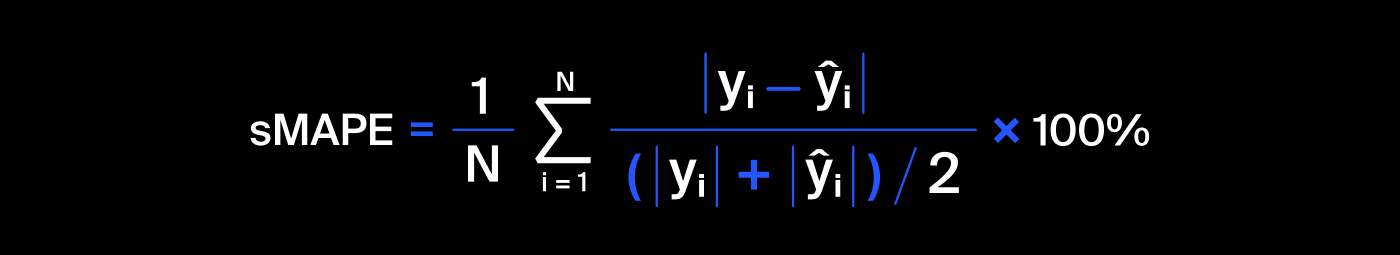


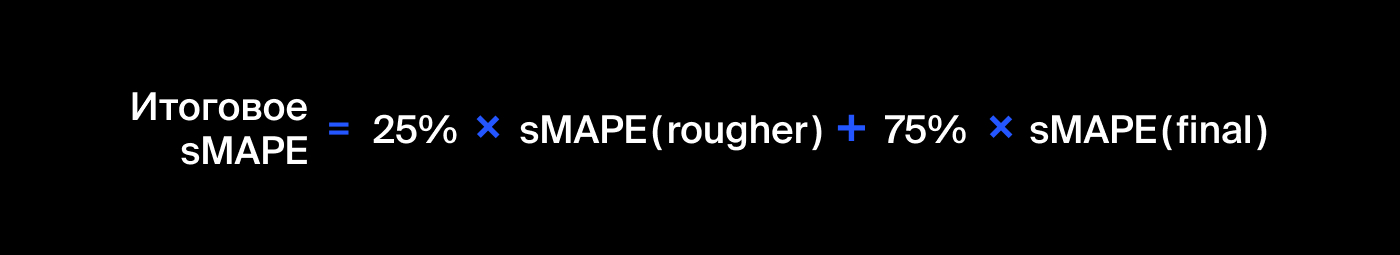

In [20]:
def smape(target, predictions):
    numerator = np.abs(target - predictions)
    denominator = (np.abs(target) + np.abs(predictions)) / 2 
    return 1 / len(target) * np.sum(numerator / denominator) * 100 
  
def final_smape(target, predictions):
    target_rougher = target['rougher.output.recovery']
    target_final = target['final.output.recovery']
    predictions_rougher = predictions[:, 0]
    predictions_final = predictions[:, 1]
    return 0.25 * smape(target_rougher, predictions_rougher) + 0.75 * smape(target_rougher, predictions_rougher)

smape_scorer = make_scorer(final_smape, greater_is_better=False)

### Построение модели

Возьмем следующие модели для нашего исследования:
* "Дерево решений"
* "Случайный лес"
* "Линейная регрессия"

Для подбора оптимальных параметров наших моделей используем функцию `Gridsearchcv`.

#### Модель "Дерево решений"

In [21]:
# Создадим параметры grid для модели DecisionTreeRegressor
param_grid_dt = {'max_depth': range(2, 8)}
# Создадим модель
dt = DecisionTreeRegressor(random_state=12345)
# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring=smape_scorer, cv=5, n_jobs=-1)

grid_search_dt.fit(features_train, target_train)

print("Лучшее значение smape для DecisionTreeRegressor:", -grid_search_dt.best_score_.round(4),
      "\nЛучшая модель:", grid_search_dt.best_params_)

# # Лучшее значение smape для DecisionTreeRegressor: 7.1871 
# # Лучшая модель: {'max_depth': 4}

Лучшее значение smape для DecisionTreeRegressor: 7.2428 
Лучшая модель: {'max_depth': 2}


#### Модель "Случайный лес"

In [22]:
%%time
# Создадим параметры для модели RandomForestRegressor
param_grid_rf = {
    'max_depth': [16],
    'n_estimators': range(100, 121, 10)
}

rf = RandomForestRegressor(random_state=12345)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              scoring=smape_scorer, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(features_train, target_train)

print("Лучшее значение smape для RandomForestRegressor:", -grid_search_rf.best_score_.round(4),
      "\nЛучшая модель:", grid_search_rf.best_params_)

# Лучшее значение smape для RandomForestRegressor: 6.7267 
# Лучшая модель: {'max_depth': 16, 'n_estimators': 110}
# CPU times: user 23min 50s, sys: 983 ms, total: 23min 51s
# Wall time: 24min 24s

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .....................max_depth=16, n_estimators=100; total time=  40.4s
[CV] END .....................max_depth=16, n_estimators=100; total time=  40.6s
[CV] END .....................max_depth=16, n_estimators=100; total time=  40.2s
[CV] END .....................max_depth=16, n_estimators=100; total time=  40.6s
[CV] END .....................max_depth=16, n_estimators=100; total time=  41.0s
[CV] END .....................max_depth=16, n_estimators=110; total time=  45.4s
[CV] END .....................max_depth=16, n_estimators=110; total time=  45.9s
[CV] END .....................max_depth=16, n_estimators=110; total time=  44.4s
[CV] END .....................max_depth=16, n_estimators=110; total time=  44.5s
[CV] END .....................max_depth=16, n_estimators=110; total time=  45.7s
[CV] END .....................max_depth=16, n_estimators=120; total time=  50.0s
[CV] END .....................max_depth=16, n_est

#### Модель "Линейная регрессия"

In [23]:
param_grid_lg = {'normalize': [False, True]}
lg = LinearRegression()
grid_search_lg = GridSearchCV(estimator=lg, param_grid=param_grid_lg, 
                              scoring=smape_scorer, cv=5, n_jobs=-1)
grid_search_lg.fit(features_train, target_train)

print("Лучшее значение smape для LinearRegression:", -grid_search_lg.best_score_.round(4),
      "\nПараметры модели:", grid_search_lg.best_params_)

# Лучшее значение smape для LinearRegression: 6.4673 
# Параметры модели: {'normalize': False}

Лучшее значение smape для LinearRegression: 7.2678 
Параметры модели: {'normalize': False}


Лучше всего показала себя модель Линейной регрессии, у которой минимальный параметр sMape.

### Тестирование модели

In [24]:
model_lg_best = LinearRegression()
model_lg_best.fit(features_train, target_train)
predicted_test = model_lg_best.predict(features_test)
print('sMape LinearRegression на тестовой выборке:', final_smape(target_test, predicted_test))

model_dt_best = DecisionTreeRegressor(random_state=12345, max_depth=4)
model_dt_best.fit(features_train, target_train)
predicted_test = model_dt_best.predict(features_test)
print('sMape DecisionTreeRegressor на тестовой выборке:', final_smape(target_test, predicted_test))

model_rf_best = RandomForestRegressor(random_state=12345, max_depth=16, n_estimators=110)
model_rf_best.fit(features_train, target_train)
predicted_test = model_rf_best.predict(features_test)
print('sMape RandomForestRegressor на тестовой выборке:', final_smape(target_test, predicted_test))

# sMape LinearRegression на тестовой выборке: 180.25066164536463
# sMape DecisionTreeRegressor на тестовой выборке: 4.719105300666309
# sMape RandomForestRegressor на тестовой выборке: 5.286425084764315

sMape LinearRegression на тестовой выборке: 4.8529687249876785
sMape DecisionTreeRegressor на тестовой выборке: 4.984045013067126
sMape RandomForestRegressor на тестовой выборке: 4.668636802937405


Лучше всего на тестовой выборке показала себя модель DecisionTreeRegressor, с sMape=4.7, хотя на обучающей выборке наблюдался худший результат из исследуемых нами моделей.

**Вывод:**
Итоговая модель - RandomForestRegressor {'max_depth': 16, 'n_estimators': 110} с sMape=5.3. Модель показала средние результаты на обучающей и тестовой выборках среди рассмотренных моделей.

Вернуться в [начало](#startpage).